# 1.爬虫

通过弹幕接口地址(XML形式)直接找到视频的弹幕数据地址  
1.发送请求，对于  https://api.bilibili.com/x/v1/dm/list.so?oid=1388034005  发送请求  
  需要注意点：-请求方式确定， -请求头参数  
2.获取数据，获取服务器返回的数据  
3.解析数据，提取想要数据内容，弹幕数据  
4.保存数据，把获取下来的数据内容保存txt文本   

In [35]:
import requests
import re   
import pandas as pd

In [36]:
# 1.发送请求
url='https://api.bilibili.com/x/v1/dm/list.so?oid=1388034005'
# headers 请求头，把python包装成浏览器发送请求
# user-agent浏览器基本身份标识
headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36 Edg/113.0.1774.50'
    
}

# 通过request模块里面get请求方法，对于url地址发送请求，
# 并且带上headers请求头，最后用response变量去接收

# 2.获取数据
response=requests.get(url=url,headers=headers)
response.encoding=response.apparent_encoding

#<Response [200]> response对象，200状态码表示请求成功
# print(response.text)


# 3.解析数据，解析方式 re[可以直接对于字符串数据进行提取]      css和xpath[主要根据标签属性/节点提取数据]
# ()精确匹配 表示想要的数据，无括号表示泛匹配。正则表达式元字符可以匹配任意字符（除了换行符\n)
# 提取弹幕内容
dmc=re.findall('<d p=".*?">(.*?)</d>',response.text)

# 提取标签信息
dms=re.findall('<d p="(.*?)">.*?</d>',response.text)


In [37]:
title=["out_time",'type','f_size','f_color','c_time','pool','user_id','dm_id']
dm_data=pd.DataFrame()
for i in range(len(title)):
    data=[]
    for j in range(len(dms)):
        data.append(dms[j].split(",")[i])
    dm_data[title[i]]=data
dm_data['comment']=dmc

# dm_data.to_excel("小米汽车发布会弹幕数据.xlsx")


In [38]:
dm_data

,out_time,type,f_size,f_color,c_time,pool,user_id,dm_id,comment
0,8232.69100,1,25,16777215,1704371589,0,75e77299,1487135691337980928,大师叫你击掌，小伙子你接不住啊 。。。给人整尴尬了 哈哈哈哈
1,10503.77100,1,25,16777215,1704197337,0,4673d943,1485673965094624256,好的，立马开始奖励
2,7155.17400,1,25,16777215,1704027112,0,ba7e98dd,1484246012477510912,不是法拉利买不起，而是小米更有性价比
3,1308.31000,1,25,16777215,1705553542,0,29dcbfa1,1497050634430804992,到时候电池坏了，就直接换车了。
4,923.41900,1,25,16777215,1704013390,0,368e4129,1484130900953788672,不容易 车领域门槛低小米却反而做自研 是怕被卡脖子嘛
5,767.18400,1,25,16777215,1704691659,0,ce87cfa3,1489820638251164416,雷总真务实，看他的发布会真舒服，不像其他家瞎几霸吹。
6,1583.12200,1,25,16777215,1704021270,0,c0ca38b4,1484197005323768064,雷总做事，还是放心的
7,1325.23700,1,25,16777215,1705238349,0,732dfdae,1494406605368943360,理论上来讲更不容易磕碰了。但电池寿命到了之后更换的成本更高了
8,7740.24300,1,25,16777215,1704385002,0,ad70e644,1487248209591020544,杜比懂得都懂
9,647.58700,1,25,16777215,1704029134,0,146744fe,1484262971801871360,智界就是品牌，请不要什么都加个华为，营销可以，但要尊重一下奇瑞


# 2.数据分析

In [39]:
dm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   out_time  2237 non-null   object
 1   type      2237 non-null   object
 2   f_size    2237 non-null   object
 3   f_color   2237 non-null   object
 4   c_time    2237 non-null   object
 5   pool      2237 non-null   object
 6   user_id   2237 non-null   object
 7   dm_id     2237 non-null   object
 8   comment   2237 non-null   object
dtypes: object(9)
memory usage: 157.4+ KB


In [40]:
# 导入词云模块
import jieba
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

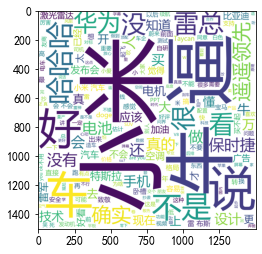

In [41]:
from functools import reduce
import operator
text_seg=dm_data['comment'].apply(jieba.lcut)
# 分词
text_list=reduce(operator.concat,text_seg.tolist())

# 列表转字符串
text_str=' '.join(text_list)

# 停用词
stop_words=open(r"hit_stopwords.txt",encoding='utf-8').read().split('\n')

# 词云图配置
wc=wordcloud.WordCloud(    
    width=1500,
    height=1500,
    background_color='white',#背景颜色
#     scale=15,
    stopwords=stop_words,
    font_path='msyh.ttc',
)
wc.generate(text_str)
wc.to_file('词云.png')

plt.imshow(wc)
plt.show()

# 3.情感分析

In [42]:
from snownlp import SnowNLP
import matplotlib
import seaborn as sns

D:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


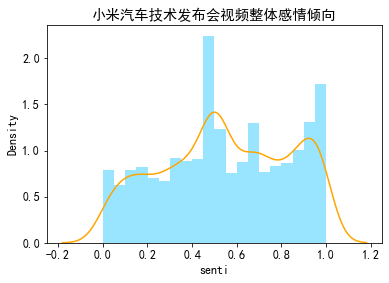

In [43]:
dm_data['senti']=dm_data['comment'].apply(lambda x:SnowNLP(x).sentiments)
pd.set_option('display.max_rows',None) #显示所有行
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['axes.unicode_minus']=False
ax=sns.distplot(dm_data['senti'],hist_kws={'color':'deepskyblue'},kde_kws={'color':'orange'},bins=20)

ax.set_title('小米汽车技术发布会视频整体感情倾向')
plt.show()

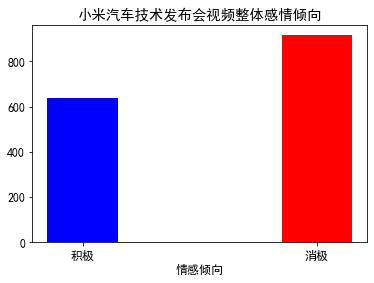

In [44]:
# 总体感情倾向做进一步分布分析

sentiment_list=dm_data['senti'].tolist()
count_list=[0,0]
for i in range(len(dm_data['senti'])):
    if sentiment_list[i]>=0.75:
        count_list[0]+=1
    elif sentiment_list[i]<0.5:
        count_list[1]+=1
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=12
color=['blue','red']
plt.bar(range(2),count_list,color=color,width=0.3)
plt.xlabel('情感倾向')
plt.xticks(range(2),['积极','消极'])
plt.title('小米汽车技术发布会视频整体感情倾向')
plt.show()

In [45]:
dm_data['senti'].describe()
# 平均值为0.54，标准差为0.28，总体数据评分比较离散

count    2237.000000
mean        0.547858
std         0.283321
min         0.000101
25%         0.333333
50%         0.526233
75%         0.790361
max         0.999938
Name: senti, dtype: float64

In [46]:
dm_data

,out_time,type,f_size,f_color,c_time,pool,user_id,dm_id,comment,senti
0,8232.69100,1,25,16777215,1704371589,0,75e77299,1487135691337980928,大师叫你击掌，小伙子你接不住啊 。。。给人整尴尬了 哈哈哈哈,0.969527
1,10503.77100,1,25,16777215,1704197337,0,4673d943,1485673965094624256,好的，立马开始奖励,0.418902
2,7155.17400,1,25,16777215,1704027112,0,ba7e98dd,1484246012477510912,不是法拉利买不起，而是小米更有性价比,0.921091
3,1308.31000,1,25,16777215,1705553542,0,29dcbfa1,1497050634430804992,到时候电池坏了，就直接换车了。,0.125574
4,923.41900,1,25,16777215,1704013390,0,368e4129,1484130900953788672,不容易 车领域门槛低小米却反而做自研 是怕被卡脖子嘛,0.997816
5,767.18400,1,25,16777215,1704691659,0,ce87cfa3,1489820638251164416,雷总真务实，看他的发布会真舒服，不像其他家瞎几霸吹。,0.740457
6,1583.12200,1,25,16777215,1704021270,0,c0ca38b4,1484197005323768064,雷总做事，还是放心的,0.970557
7,1325.23700,1,25,16777215,1705238349,0,732dfdae,1494406605368943360,理论上来讲更不容易磕碰了。但电池寿命到了之后更换的成本更高了,0.437835
8,7740.24300,1,25,16777215,1704385002,0,ad70e644,1487248209591020544,杜比懂得都懂,0.910885
9,647.58700,1,25,16777215,1704029134,0,146744fe,1484262971801871360,智界就是品牌，请不要什么都加个华为，营销可以，但要尊重一下奇瑞,0.319137


In [47]:
import time

# 定义一个函数来转换时间戳为 HH:MM:SS 格式
def convert_timestamp_to_strftime(timestamp):
    return time.strftime('%H:%M:%S', time.gmtime(timestamp))

# 使用 apply 方法应用这个函数到每一行的 'out_time' 列
dm_data['out_time'] = dm_data['out_time'].apply(lambda x: float(x)).astype(int)
dm_data['视频进度']=dm_data['out_time'].apply(convert_timestamp_to_strftime)


dm_data.groupby('视频进度')[['dm_id']].count().sort_values('dm_id',ascending=False)[:10]

,dm_id
视频进度,
00:00:00,9
02:11:23,5
00:58:20,5
00:11:47,5
00:57:37,4
00:15:17,4
00:12:10,4
00:27:20,4
01:18:45,3


In [48]:
dm_data.groupby('user_id')[['dm_id']].count().sort_values('dm_id',ascending=False)[:3]

,dm_id
user_id,
d8e699b3,52
ca913ba3,37
2fcbbb9d,35
